https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/hypothesis-test-examples?ex=1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#data set
# فروش ما باتوجه به صفحه دیزاین 1
a = np.array([23, 21, 19, 24, 35, 17, 18, 20, 28, 42, 21, 32])
b = np.array([21, 25, 33, 42, 32, 14, 18, 25, 30, 19, 20, 34])

In [3]:
a.mean()

25.0

In [4]:
b.mean()

26.083333333333332

In [5]:
diff = b.mean() - a.mean()
diff

1.0833333333333321

In [7]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [8]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])
sales

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [23., 21., 19., 24., 35., 17., 18., 20., 28., 42., 21., 32., 21.,
        25., 33., 42., 32., 14., 18., 25., 30., 19., 20., 34.]])

In [9]:
salesT = sales.T
salesT

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 20.],
       [ 0., 28.],
       [ 0., 42.],
       [ 0., 21.],
       [ 0., 32.],
       [ 1., 21.],
       [ 1., 25.],
       [ 1., 33.],
       [ 1., 42.],
       [ 1., 32.],
       [ 1., 14.],
       [ 1., 18.],
       [ 1., 25.],
       [ 1., 30.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 34.]])

In [10]:
np.random.shuffle(salesT)

In [11]:
salesT

array([[ 0., 17.],
       [ 1., 18.],
       [ 0., 42.],
       [ 0., 18.],
       [ 1., 21.],
       [ 0., 23.],
       [ 0., 21.],
       [ 1., 25.],
       [ 0., 20.],
       [ 1., 30.],
       [ 0., 24.],
       [ 1., 19.],
       [ 1., 34.],
       [ 1., 42.],
       [ 1., 20.],
       [ 1., 33.],
       [ 0., 28.],
       [ 0., 21.],
       [ 0., 35.],
       [ 1., 32.],
       [ 1., 25.],
       [ 0., 32.],
       [ 0., 19.],
       [ 1., 14.]])

In [12]:
experimentLabel = np.random.randint(0, 2, len(salesT))
experimentLabel

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1])

In [13]:
experimentData = np.array([
    experimentLabel,
    salesT[:, 1]
])
print(experimentData)

[[ 0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.
   0.  1.  1.  0.  1.  1.]
 [17. 18. 42. 18. 21. 23. 21. 25. 20. 30. 24. 19. 34. 42. 20. 33. 28. 21.
  35. 32. 25. 32. 19. 14.]]


In [14]:
experimentDataT = experimentData.T
experimentDataT

array([[ 0., 17.],
       [ 1., 18.],
       [ 1., 42.],
       [ 0., 18.],
       [ 0., 21.],
       [ 1., 23.],
       [ 1., 21.],
       [ 1., 25.],
       [ 1., 20.],
       [ 0., 30.],
       [ 1., 24.],
       [ 1., 19.],
       [ 1., 34.],
       [ 1., 42.],
       [ 1., 20.],
       [ 1., 33.],
       [ 0., 28.],
       [ 0., 21.],
       [ 0., 35.],
       [ 1., 32.],
       [ 1., 25.],
       [ 0., 32.],
       [ 1., 19.],
       [ 1., 14.]])

In [17]:
experimentDataT[experimentDataT[:, 0] == 0][:, 1].mean()

25.25

In [18]:
experimentDataT[experimentDataT[:, 0] == 1][:, 1].mean()

25.6875

In [20]:
def shufExper(N): # shuffle experiment
    experimentDiffMean = np.empty([N, 1])
    for times in np.arange(N):
        experimentLabel = np.random.randint(0, 2, len(salesT))
        experimentData = np.array([
            experimentLabel,
            salesT[:, 1]
        ]).T
        experimentDiffMean[times] = experimentData[experimentData[:, 0] == 1][:, 1].mean() - experimentData[experimentData[:, 0] == 0][:, 1].mean()
    
    return experimentDiffMean

e = shufExper(1000)

In [22]:
print(e)

[[ 3.28671329e-01]
 [-3.88888889e+00]
 [-1.08333333e+00]
 [-2.64444444e+00]
 [ 1.74825175e-01]
 [-1.25000000e-01]
 [-5.38571429e+00]
 [ 1.50349650e+00]
 [-3.01428571e+00]
 [-3.04444444e+00]
 [ 8.32167832e-01]
 [-3.26315789e-01]
 [-2.00000000e+00]
 [ 4.58333333e+00]
 [-5.11111111e-01]
 [ 5.11111111e-01]
 [-1.60839161e-01]
 [ 6.25000000e-01]
 [-5.75714286e+00]
 [ 3.17777778e+00]
 [-2.67832168e+00]
 [-3.34965035e+00]
 [ 2.75000000e+00]
 [-4.52857143e+00]
 [ 2.91666667e+00]
 [ 6.88888889e-01]
 [ 5.68750000e+00]
 [ 2.02097902e+00]
 [-4.14285714e-01]
 [ 1.47142857e+00]
 [ 6.87412587e+00]
 [ 3.84285714e+00]
 [-2.75000000e+00]
 [-2.28888889e+00]
 [-5.48739496e+00]
 [-2.84285714e+00]
 [ 2.25000000e+00]
 [ 1.43750000e+00]
 [ 8.02222222e+00]
 [-1.06250000e+00]
 [-4.61111111e+00]
 [ 1.18181818e+00]
 [-5.55714286e+00]
 [-5.83333333e-01]
 [ 7.81250000e+00]
 [-5.10489510e-01]
 [ 7.06250000e+00]
 [ 5.53333333e+00]
 [ 1.85314685e+00]
 [-4.75000000e+00]
 [-2.86013986e+00]
 [-6.61428571e+00]
 [ 2.6428571

In [25]:
len(e[e >= diff])

354

In [26]:
e[e >= diff]

array([1.5034965 , 4.58333333, 3.17777778, 2.75      , 2.91666667,
       5.6875    , 2.02097902, 1.47142857, 6.87412587, 3.84285714,
       2.25      , 1.4375    , 8.02222222, 1.18181818, 7.8125    ,
       7.0625    , 5.53333333, 1.85314685, 2.64285714, 1.34965035,
       2.125     , 4.04285714, 2.67142857, 2.08333333, 3.52857143,
       8.2       , 1.58333333, 1.58333333, 4.72857143, 2.41666667,
       3.87142857, 2.84615385, 1.8125    , 2.375     , 3.38655462,
       1.16783217, 4.625     , 2.47142857, 3.84285714, 4.01428571,
       4.82222222, 1.51748252, 5.86713287, 6.70629371, 1.93333333,
       3.35555556, 1.18181818, 9.44444444, 1.3       , 6.38461538,
       1.18181818, 2.58333333, 3.        , 3.85314685, 3.58333333,
       4.82222222, 1.68531469, 2.17482517, 3.15714286, 7.44285714,
       4.02097902, 5.37762238, 3.41666667, 6.87412587, 1.62222222,
       1.44285714, 3.51748252, 1.3       , 3.91666667, 3.25      ,
       3.68531469, 4.6       , 3.18181818, 1.5625    , 5.66666

In [27]:
354 / 1000
# سی و پنج درصد مواقع دیتای رندومی که از طریف تابع گرفتیم اختلاف دیتا بیشتر از اختلاف اولیه یعنی 1.083 بوده است
# چون بالاتر از 5 درصد هست پس به این نتیجه میرسیم که به احتمال زیاد فروش به دست آمده شانسی بوده است

0.354

/home/shahin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

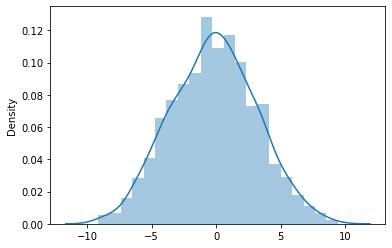

In [30]:
sns.distplot(e)

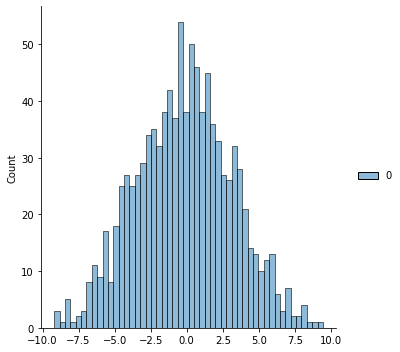

In [34]:
sns.displot(e, bins=50)